In [1]:
# import libraries
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [2]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
#Show subsets
print(f'Training data exapmle: {trainX[0]}')
print(f'Training label example : {trainy[0]}\n')

print(f'Test data example: {testX[0]}')
print(f'Test label example: {testy[0]}')

Training data exapmle: [-0.55101241 -0.71631908  0.17541549  0.88382863  1.75099507  0.08757814
 -0.62203328  0.0172082  -0.03740678  0.12122995  1.07912923  1.26385501
  0.53917476 -0.7937163   0.43606836 -1.86225954  0.04361309 -0.02444602
 -0.48038249 -0.05948312]
Training label example : 0

Test data example: [ 1.84222699 -0.46434485 -0.05381296  0.28736078  0.25046871  1.21414676
  0.13803022  1.40237629 -2.04988642  0.38786048 -1.99021805 -1.01418545
  2.43581563 -0.82162712 -1.09731828 -1.24915719 -0.08896656  0.80643863
  0.40912571 -0.19642545]
Test label example: 1


In [3]:
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

LogisticRegression()

In [4]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
print(f'No Skill probabilities: {ns_probs[0]}')
# predict probabilities
lr_probs = model.predict_proba(testX)
print(f'Logistic probabilities: {lr_probs[0]}')
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

No Skill probabilities: 0
Logistic probabilities: [0.00402732 0.99597268]


In [12]:
# read the data from the reference file
with open('/home/jmramirez/Documentos/COPERIA/infer_pipeline/data/reference', 'r') as f:
    data = f.readlines()
# read labels
labels = [line.strip().split(' ')[1] for line in data]
print(labels)

with open('/home/jmramirez/Documentos/COPERIA/infer_pipeline/results/wav_test_scores.txt', 'r') as f:
    data = f.readlines()
# read scores
scores = [float(line.strip().split(' ')[1]) for line in data]
print(scores)

['p', 'n', 'n', 'p', 'p', 'n']
[0.2354492826083683, 0.2354492826083683, 0.2354492826083683, 0.05786493846348354, 0.05786493846348354, 0.05786493846348354]


In [20]:
# calculate scores
test_auc = roc_auc_score(labels, scores)
# summarize scores
print(f'Logistic: ROC AUC={test_auc:.3f}')

Logistic: ROC AUC=0.333


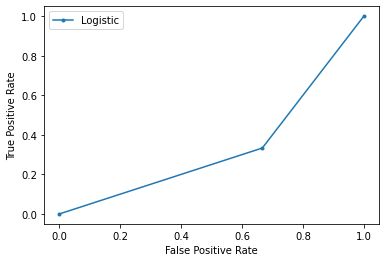

In [23]:
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(labels, scores, pos_label='p')
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [24]:
# calculate the specificity
specificity = lr_tpr[0]
sensitivity = lr_tpr[1]
print(f'Specificity: {specificity:.3f}')
print(f'Sensitivity: {sensitivity:.3f}')

Specificity: 0.000
Sensitivity: 0.333
